In [2]:
%run stdPackages.ipynb

## 1. Data and settings

In [3]:
t0date = 2010
ngrid = 30
ns0 = 25
t_ss  = 5 # number of periods in steady state
%run ArgentinaData.ipynb

### Test PEE solver:

Start calibrating to LOG case:

In [4]:
cal_log = m.calibLOG()
sol_log = m.LOG.FH()
path_log = m.EE_FH_LOG_solve(sol_log)

Broadcast log-solution to the CRRA model:

In [5]:
m.PEE.interpInitialsFromLOG(sol_log, path_log)
m.PEE.kwargs_t['x0_from_solp'] = False # Use x0 instead of solp when iterating over time

Adjust $\rho$ and test solutions:

In [6]:
ρ = 1.1
m.db.update(m.adjPar('ρ',ρ))

### Test stuff

Solve for all:

In [14]:
sols = m.PEE.FH()

Look at policy function:

In [7]:
from argentina_policy import *
self = m.PEE

In [15]:
sol = sols[0]

Zoom into index 10 for state $s_0$: When we vary $s_{t-1}$ here, how does interpolated values of $s_t$ and $s_t^0/s_t$ look like?
* $s_t$ is gradually increasing from $0.003$ to $0.01$. These values are all well inside the bounds (and varies from 12-25).
* $s_t^0/s_t$ is also smoothly increasing from $0.441$ to $0.4445$. This is all between the same two gridpoints (11,12).
* It looks like the problem comes directly from the gridded approximation of gradients:

In [16]:
s = pd.Series(sol['s'], index = self.db['ss0Idx']).xs(10,level='s0Idx')
s0 = pd.Series(sol['s0/s'], index = self.db['ss0Idx']).xs(10,level='s0Idx')

In [17]:
np.searchsorted(self.db['s0Grid'], s0)

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

In [54]:
sol.keys()

dict_keys(['s[t-1]', 's0/s[t-1]', 'τ_unbounded', 's', 's0/s', 'τ', 'Θh', 'h', 'Θs', 'Bi', 'B0', 'Γs', 'si/s', 'Ω', 'Ψ', 'σ', '∂ln(s)/∂τ[t+1]', '∂ln(Γs)/∂τ[t+1]', '∂ln(h)/∂τ[t+1]', '∂(s0/s)/∂τ[t+1]', '∂ln(s)/∂τ', '∂ln(Γs)/∂τ', '∂ln(h)/∂τ', '∂(s0/s)/∂τ', 'dτ[t+1]/dτ', 'dln(s)/dτ', 'd(s0/s)/dτ', 'dln(h)/dτ', 'dln(Γs)/dτ', 'x_unbounded', 'dτ/ds[t-1]', 'dτ/d(s0/s)', 'dln(h)/dln(s[t-1])', '∂ln(h)/∂ln(s[t-1])'])

In [67]:
# k = list(sol.keys())[]
k = 's'

In [68]:
y = pd.Series(sol[k], index = m.db['ss0Idx'])
s0plot = m.db['s0Idx'][[10]]
splot  = m.db['sIdx'][[10]]

Estimate this:

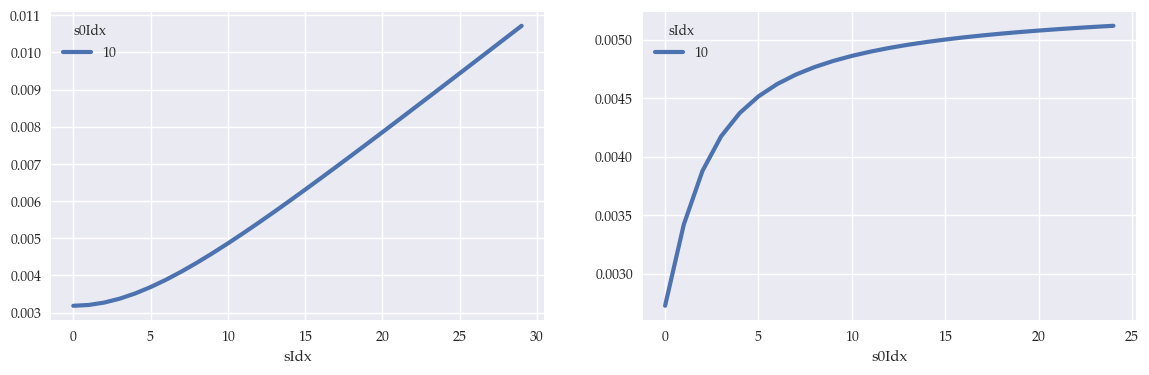

In [69]:
fig, axes = plt.subplots(1, 2, figsize = (14,4))
seaborn.lineplot(data = adj.rc_pd(y, s0plot).unstack('s0Idx'), linewidth = 3, ax = plt.subplot(1,2,1));
seaborn.lineplot(data = adj.rc_pd(y, splot).unstack('sIdx'), linewidth = 3, ax = plt.subplot(1,2,2));

Test Chebyshev approximation:

In [71]:
ya = y.xs(10,level='s0Idx').values
xa = self.db['sGrid']
gxa = -1+2*(xa-xa[0])/(xa[-1]-xa[0])

Check it out:

In [76]:
gxa

array([-1.        , -0.99762188, -0.99048751, -0.97859691, -0.96195006,
       -0.94054697, -0.91438763, -0.88347206, -0.84780024, -0.80737218,
       -0.76218787, -0.71224732, -0.65755054, -0.5980975 , -0.53388823,
       -0.46492271, -0.39120095, -0.31272295, -0.2294887 , -0.14149822,
       -0.04875149,  0.04875149,  0.1510107 ,  0.25802616,  0.36979786,
        0.4863258 ,  0.60760999,  0.73365042,  0.86444709,  1.        ])